In [87]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
%cd /content/drive/MyDrive/Projeto\ Vendas\ Temporal

/content/drive/MyDrive/Projeto Vendas Temporal


In [89]:
# Ignorar avisos
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Exploração dos dados

In [90]:
# Carregar base de dados
import pandas as pd
df = pd.read_csv('Walmart_Sales.csv')

In [91]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [93]:
df['Store'] = df['Store'].astype('category')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')
df['Temperature'] = df['Temperature'].astype('float32')
df['Fuel_Price'] = df['Fuel_Price'].astype('float32')
df['CPI'] = df['CPI'].astype('float32')
df['Unemployment'] = df['Unemployment'].astype('float32')
df['Weekly_Sales'] = df['Weekly_Sales'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Date          6435 non-null   object  
 2   Weekly_Sales  6435 non-null   float32 
 3   Holiday_Flag  6435 non-null   category
 4   Temperature   6435 non-null   float32 
 5   Fuel_Price    6435 non-null   float32 
 6   CPI           6435 non-null   float32 
 7   Unemployment  6435 non-null   float32 
dtypes: category(2), float32(5), object(1)
memory usage: 190.2+ KB


In [94]:
# Formatar a coluna Date para atributo categórico
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float32       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float32       
 5   Fuel_Price    6435 non-null   float32       
 6   CPI           6435 non-null   float32       
 7   Unemployment  6435 non-null   float32       
dtypes: category(2), datetime64[ns](1), float32(5)
memory usage: 190.2 KB


In [95]:
# Extração de informações do atributo categórico data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # (0 = segunda, 6 = domingo)
df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)  # Feriados e fins de semana


In [96]:
for col in ['Year', 'Month', 'Day', 'Weekday', 'IsWeekend']:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float32       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float32       
 5   Fuel_Price    6435 non-null   float32       
 6   CPI           6435 non-null   float32       
 7   Unemployment  6435 non-null   float32       
 8   Year          6435 non-null   category      
 9   Month         6435 non-null   category      
 10  Day           6435 non-null   category      
 11  Weekday       6435 non-null   category      
 12  IsWeekend     6435 non-null   category      
dtypes: category(7), datetime64[ns](1), float32(5)
memory usage: 223.1 KB


# Engenharia de features

In [97]:
# Engenharia de features baseada em vendas
df['Sales_Lag1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Sales_Lag2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Avg_Monthly_Sales'] = df.groupby(['Year'])['Weekly_Sales'].transform('mean')
df['Avg_Weekly_Sales'] = df.groupby(['Month', 'Day'])['Weekly_Sales'].transform('mean')
df['Sales_Diff1'] = df['Weekly_Sales'] - df['Sales_Lag1']
df['Sales_Diff2'] = df['Weekly_Sales'] - df['Sales_Lag2']
df['Sales_Diff_Pct1'] = df['Weekly_Sales'] / df['Sales_Lag1'] - 1
df['Sales_Diff_Pct2'] = df['Weekly_Sales'] / df['Sales_Lag2'] - 1

# Engenharia de features baseada na temperatura
df['Temp_Lag1'] = df.groupby('Store')['Temperature'].shift(1)
df['Temp_Diff1'] = df['Temperature'] - df['Temp_Lag1']
df['Temp_Diff_Pct1'] = df['Temperature'] / df['Temp_Lag1'] - 1

# Engenharia de dados baseada em CPI
df['CPI_Lag1'] = df.groupby('Store')['CPI'].shift(1)
df['CPI_Diff1'] = df['CPI'] - df['CPI_Lag1']
df['CPI_Diff_Pct1'] = df['CPI'] / df['CPI_Lag1'] - 1

#Engenharia de dados baseada em Fuel_Price
df['Fuel_Price_Lag1'] = df.groupby('Store')['Fuel_Price'].shift(1)
df['Fuel_Price_Diff1'] = df['Fuel_Price'] - df['Fuel_Price_Lag1']
df['Fuel_Price_Diff_Pct1'] = df['Fuel_Price'] / df['Fuel_Price_Lag1'] - 1

# Enhenharia de dados baseada em Unemployment
df['Unemployment_Lag1'] = df.groupby('Store')['Unemployment'].shift(1)
df['Unemployment_Diff1'] = df['Unemployment'] - df['Unemployment_Lag1']
df['Unemployment_Diff_Pct1'] = df['Unemployment'] / df['Unemployment_Lag1'] - 1

In [98]:
# Transformação logarítmica para estabilizar grandes variações
import numpy as np
df['Log_Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: 0 if x == 0 else np.log(x))
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
0,1,2010-02-05,1643690.875,0,42.310001,2.572,211.096359,8.106,2010,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.312455
1,1,2010-02-12,1641957.500,1,38.509998,2.548,211.242172,8.106,2010,2,...,211.096359,0.145813,0.000691,2.572,-0.024,-0.009331,8.106,0.0,0.0,14.311400
2,1,2010-02-19,1611968.125,0,39.930000,2.514,211.289139,8.106,2010,2,...,211.242172,0.046967,0.000222,2.548,-0.034,-0.013344,8.106,0.0,0.0,14.292966
3,1,2010-02-26,1409727.625,0,46.630001,2.561,211.319641,8.106,2010,2,...,211.289139,0.030502,0.000144,2.514,0.047,0.018695,8.106,0.0,0.0,14.158907
4,1,2010-03-05,1554806.625,0,46.500000,2.625,211.350143,8.106,2010,3,...,211.319641,0.030502,0.000144,2.561,0.064,0.024990,8.106,0.0,0.0,14.256862


In [99]:
# Passar a coluna Date para index e definir a frequência semanal
df = df.drop_duplicates(subset=['Date'])
df = df.set_index('Date').asfreq('W-THU', method='ffill')
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-11,1,1643690.875,0,42.310001,2.572,211.096359,8.106,2010,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.312455
2010-02-18,1,1641957.500,1,38.509998,2.548,211.242172,8.106,2010,2,12,...,211.096359,0.145813,0.000691,2.572,-0.024,-0.009331,8.106,0.0,0.0,14.311400
2010-02-25,1,1611968.125,0,39.930000,2.514,211.289139,8.106,2010,2,19,...,211.242172,0.046967,0.000222,2.548,-0.034,-0.013344,8.106,0.0,0.0,14.292966
2010-03-04,1,1409727.625,0,46.630001,2.561,211.319641,8.106,2010,2,26,...,211.289139,0.030502,0.000144,2.514,0.047,0.018695,8.106,0.0,0.0,14.158907
2010-03-11,1,1554806.625,0,46.500000,2.625,211.350143,8.106,2010,3,5,...,211.319641,0.030502,0.000144,2.561,0.064,0.024990,8.106,0.0,0.0,14.256862


In [100]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'IsWeekend',
       'Sales_Lag1', 'Sales_Lag2', 'Avg_Monthly_Sales', 'Avg_Weekly_Sales',
       'Sales_Diff1', 'Sales_Diff2', 'Sales_Diff_Pct1', 'Sales_Diff_Pct2',
       'Temp_Lag1', 'Temp_Diff1', 'Temp_Diff_Pct1', 'CPI_Lag1', 'CPI_Diff1',
       'CPI_Diff_Pct1', 'Fuel_Price_Lag1', 'Fuel_Price_Diff1',
       'Fuel_Price_Diff_Pct1', 'Unemployment_Lag1', 'Unemployment_Diff1',
       'Unemployment_Diff_Pct1', 'Log_Weekly_Sales'],
      dtype='object')

In [101]:
# Guardar todas as colunas categóricas
cat_cols = df.select_dtypes(include=['category']).columns
cat_cols

Index(['Store', 'Holiday_Flag', 'Year', 'Month', 'Day', 'Weekday',
       'IsWeekend'],
      dtype='object')

In [102]:
# Guardar todas as colunas numéricas
num_cols = df.select_dtypes(include=['float32']).columns
num_cols

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Sales_Lag1', 'Sales_Lag2', 'Avg_Monthly_Sales', 'Avg_Weekly_Sales',
       'Sales_Diff1', 'Sales_Diff2', 'Sales_Diff_Pct1', 'Sales_Diff_Pct2',
       'Temp_Lag1', 'Temp_Diff1', 'Temp_Diff_Pct1', 'CPI_Lag1', 'CPI_Diff1',
       'CPI_Diff_Pct1', 'Fuel_Price_Lag1', 'Fuel_Price_Diff1',
       'Fuel_Price_Diff_Pct1', 'Unemployment_Lag1', 'Unemployment_Diff1',
       'Unemployment_Diff_Pct1'],
      dtype='object')

In [103]:
# Remover valores faltantes
df = df.dropna()
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-25,1,1611968.125,0,39.930000,2.514,211.289139,8.106,2010,2,19,...,211.242172,0.046967,0.000222,2.548,-0.034,-0.013344,8.106,0.0,0.0,14.292966
2010-03-04,1,1409727.625,0,46.630001,2.561,211.319641,8.106,2010,2,26,...,211.289139,0.030502,0.000144,2.514,0.047,0.018695,8.106,0.0,0.0,14.158907
2010-03-11,1,1554806.625,0,46.500000,2.625,211.350143,8.106,2010,3,5,...,211.319641,0.030502,0.000144,2.561,0.064,0.024990,8.106,0.0,0.0,14.256862
2010-03-18,1,1439541.625,0,57.790001,2.667,211.380646,8.106,2010,3,12,...,211.350143,0.030502,0.000144,2.625,0.042,0.016000,8.106,0.0,0.0,14.179835
2010-03-25,1,1472515.750,0,54.580002,2.720,211.215637,8.106,2010,3,19,...,211.380646,-0.165009,-0.000781,2.667,0.053,0.019873,8.106,0.0,0.0,14.202483


# Préprocessamento dos dados

In [104]:
# Codificar colunas categóricas com Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(lambda x: le.fit_transform(x))
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-25,0,1611968.125,0,39.930000,2.514,211.289139,8.106,0,1,18,...,211.242172,0.046967,0.000222,2.548,-0.034,-0.013344,8.106,0.0,0.0,14.292966
2010-03-04,0,1409727.625,0,46.630001,2.561,211.319641,8.106,0,1,25,...,211.289139,0.030502,0.000144,2.514,0.047,0.018695,8.106,0.0,0.0,14.158907
2010-03-11,0,1554806.625,0,46.500000,2.625,211.350143,8.106,0,2,4,...,211.319641,0.030502,0.000144,2.561,0.064,0.024990,8.106,0.0,0.0,14.256862
2010-03-18,0,1439541.625,0,57.790001,2.667,211.380646,8.106,0,2,11,...,211.350143,0.030502,0.000144,2.625,0.042,0.016000,8.106,0.0,0.0,14.179835
2010-03-25,0,1472515.750,0,54.580002,2.720,211.215637,8.106,0,2,18,...,211.380646,-0.165009,-0.000781,2.667,0.053,0.019873,8.106,0.0,0.0,14.202483


In [105]:
# Normalizar as colunas numéricas com MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df[num_cols] = scaler.fit_transform(df[num_cols])
#df.head()

# Treinamento dos algoritmos

In [106]:
# Separar a base de dados em previsores e classe
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

In [107]:
# Dividir em bases de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Guardar variáveis de teste e treinamento
import pickle
with open('/content/drive/MyDrive/Projeto Vendas Temporal/vendas.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

In [109]:
# Tamanho de X_train
X_train.shape

(112, 32)

In [110]:
# Treinamento da regressão linear simples
# Importar bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar o modelo
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular erros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os erros
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.00
R²: 1.00


In [111]:
# Treinamento de Decision Tree Regressor
# Importar bibliotecas
from sklearn.tree import DecisionTreeRegressor

# Instanciar o modelo
regressor_arvore = DecisionTreeRegressor(random_state=42)

# Treinar o modelo
regressor_arvore.fit(X_train, y_train)

# Fazer previsões
y_pred = regressor_arvore.predict(X_test)

# Calcular erros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os erros
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 8034356810.74
R²: 0.70


In [112]:
# Treinamento do modelo Gradient Boosting XGBoost
# Importar bibliotecas
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar o modelo
regressor_xgb = XGBRegressor(n_estimators=200, random_state=42)

# Treinar o modelo
regressor_xgb.fit(X_train, y_train)

# Fazer previsões
y_pred = regressor_xgb.predict(X_test)

# Calcular erros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os erros
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 3333651200.00
R²: 0.88


In [113]:
# Treinamento do modelo de regressão Random Forest
# Importar bibliotecas
from sklearn.ensemble import RandomForestRegressor

# Instanciar o modelo
regressor_rf = RandomForestRegressor(n_estimators=400, random_state=42)

# Treinar o modelo
regressor_rf.fit(X_train, y_train.ravel())

# Fazer previsões
y_pred = regressor_rf.predict(X_test)

# Calcular erros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os erros
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 2589247630.39
R²: 0.90


In [114]:
# Treinamento do modelo SVM
# Importar bibliotecas
from sklearn.svm import SVR

# Instanciar o modelo
regressor_svr = SVR(kernel='linear')

# Treinar o modelo
regressor_svr.fit(X_train, y_train.ravel())

# Fazer previsões
y_pred = regressor_svr.predict(X_test).reshape(-1, 1)

# Calcular erros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar erros
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 269909601410.26
R²: -8.99


In [115]:
# Treinamento do modelo de Redes Neurais de Regressão MLP
# Importar bibliotecas
from sklearn.neural_network import MLPRegressor

# Instanciar o modelo
regressao_mlp = MLPRegressor(max_iter=200, random_state=42)

# Treinar o modelo
regressao_mlp.fit(X_train, y_train.ravel())

# Fazer previsões
y_pred = regressao_mlp.predict(X_test)

# Calcular erros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os erros
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 7898249467.19
R²: 0.71


In [116]:
# Escolha dos parâmetros para validação cruzada
# Importar bibliotecas
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Escolha dos parâmetros para Decision Tree Regressor
param_grid_arvore = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Escolha dos parâmetros para XGBRegressor

param_grid_xgb = {
    'n_estimators': [100, 200, 250],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'random_state': [42]
}

# Escolha dos parâmetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

# Escolha dos parâmetros para SVM
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

# Escolha dos parâmetros para Redes Neurais de Regressão MLP
param_grid_mlp = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.00, 0.01, 0.1],
    'max_iter': [100, 200, 300],
    'random_state': [42]
}

# Atributos previsores
X = np.concatenate((X_train, X_test), axis = 0)

# Atributos de classe
y = np.concatenate((y_train, y_test), axis = 0)

# Fazer o tuning dos parâmetros para Decision Tree Regressor
grid_search_arvore = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_arvore)
grid_search_arvore.fit(X, y)
melhores_parametros_arvore = grid_search_arvore.best_params_
print(melhores_parametros_arvore)
print(grid_search_arvore.best_score_)

# Fazer o tuning dos parâmetros para XGBRegressor
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xgb)
grid_search_xgb.fit(X, y)
melhores_parametros_xgb = grid_search_xgb.best_params_
print(melhores_parametros_xgb)
print(grid_search_xgb.best_score_)

# Fazer o tuning dos parâmetros para Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf)
grid_search_rf.fit(X, y)
melhores_parametros_rf = grid_search_rf.best_params_
print(melhores_parametros_rf)
print(grid_search_rf.best_score_)

# Fazer o tuning dos parâmetros para SVM
grid_search_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr)
grid_search_svr.fit(X, y)
melhores_parametros_svr = grid_search_svr.best_params_
print(melhores_parametros_svr)
print(grid_search_svr.best_score_)

# Fazer o tuning dos parâmetros para Redes Neurais de Regressão MLP
grid_search_mlp = GridSearchCV(estimator=MLPRegressor(), param_grid=param_grid_mlp)
grid_search_mlp.fit(X, y)
melhores_parametros_mlp = grid_search_mlp.best_params_
print(melhores_parametros_mlp)
print(grid_search_mlp.best_score_)

{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
0.7662495662143256
{'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 250, 'random_state': 42}
0.9601481080055236
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
0.890253867127267
{'degree': 4, 'kernel': 'poly'}
-0.1284317678462318
{'activation': 'tanh', 'alpha': 0.0, 'max_iter': 300, 'random_state': 42, 'solver': 'sgd'}
0.6276291884967373


# Validação cruzada

In [117]:
# Validação cruzada
# Importar bibliotecas
from sklearn.model_selection import cross_val_score, KFold

# Rodar os algoritmos 30 vezes
resultados_arvore = []
resultados_xgb = []
resultados_rf = []
resultados_svr = []
resultados_mlp = []

for i in range(10):
  print(i)
  kfold = KFold(n_splits=3, shuffle=True, random_state=i)

  arvore = DecisionTreeRegressor(**melhores_parametros_arvore)
  scores_arvore = cross_val_score(arvore, X, y, cv=kfold)
  resultados_arvore.append(scores_arvore.mean())

  xgb = XGBRegressor(**melhores_parametros_xgb)
  scores_xgb = cross_val_score(xgb, X, y, cv=kfold)
  resultados_xgb.append(scores_xgb.mean())

  rf = RandomForestRegressor(**melhores_parametros_rf)
  scores_rf = cross_val_score(rf, X, y, cv=kfold)
  resultados_rf.append(scores_rf.mean())

  svr = SVR(**melhores_parametros_svr)
  scores_svr = cross_val_score(svr, X, y, cv=kfold)
  resultados_svr.append(scores_svr.mean())

  mlp = MLPRegressor(**melhores_parametros_mlp)
  scores_mlp = cross_val_score(mlp, X, y, cv=kfold)
  resultados_mlp.append(scores_mlp.mean())

# Mostrar melhores resultados
resultados = pd.DataFrame({'Decision Tree Regressor': resultados_arvore,
                           'XGBoost': resultados_xgb,
                           'Random Forest': resultados_rf,
                           'SVM': resultados_svr,
                           'MLP': resultados_mlp})
resultados



0
1
2
3
4
5
6
7
8
9


,Decision Tree Regressor,XGBoost,Random Forest,SVM,MLP
0,0.592398,0.886997,0.816050,-0.020421,0.573133
1,0.682046,0.938854,0.867951,-0.024051,0.656820
2,0.582147,0.890771,0.873549,-0.023908,0.702586
3,0.624624,0.880956,0.811221,-0.040688,0.538366
4,0.689413,0.890519,0.858069,-0.090971,0.590522
5,0.647841,0.918465,0.841325,-0.048900,0.661301
6,0.753194,0.924393,0.859793,-0.035562,0.664714
7,0.558651,0.936811,0.877677,-0.042148,0.698429
8,0.676519,0.902021,0.844658,-0.093386,0.683036
9,0.587304,0.923759,0.856623,-0.048587,0.693571


# Teste de normalidade nos resultados

In [118]:
# Shapiro
# Importar bibliotecas
from scipy.stats import shapiro
alpha = 0.05

# Testar com Shapiro
stat_arvore, p_arvore = shapiro(resultados_arvore)
if p_arvore > alpha:
  print('Não há evidências de normalidade (não rejeitamos H0)')
else:
  print('Há evidências de normalidade (rejeitamos H0)')
stat_xgb, p_xgb = shapiro(resultados_xgb)
if p_xgb > alpha:
  print('Não há evidências de normalidade (não rejeitamos H0)')
else:
  print('Há evidências de normalidade (rejeitamos H0)')
stat_rf, p_rf = shapiro(resultados_rf)
if p_rf > alpha:
  print('Não há evidências de normalidade (não rejeitamos H0)')
else:
  print('Há evidências de normalidade (rejeitamos H0)')
stat_svr, p_svr = shapiro(resultados_svr)
if p_svr > alpha:
  print('Não há evidências de normalidade (não rejeitamos H0)')
else:
  print('Há evidências de normalidade (rejeitamos H0)')
stat_mlp, p_mlp = shapiro(resultados_mlp)
if p_mlp > alpha:
  print('Não há evidências de normalidade (não rejeitamos H0)')
else:
  print('Há evidências de normalidade (rejeitamos H0)')

Não há evidências de normalidade (não rejeitamos H0)
Não há evidências de normalidade (não rejeitamos H0)
Não há evidências de normalidade (não rejeitamos H0)
Há evidências de normalidade (rejeitamos H0)
Não há evidências de normalidade (não rejeitamos H0)


# Teste de hipótese com ANOVA

In [119]:
# ANOVA
# Importar bibliotecas
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
alpha = 0.05

# Testar com ANOVA
stat, p = f_oneway(resultados_arvore, resultados_xgb, resultados_rf, resultados_svr, resultados_mlp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('Não há diferença significativa entre as médias (não rejeitamos H0)')
else:
  print('Há diferença significativa entre as médias (rejeitamos H0)')

# Tukey
# Calculate the mean for each group
mean_arvore = np.mean(resultados_arvore)
mean_xgb = np.mean(resultados_xgb)
mean_rf = np.mean(resultados_rf)
mean_svr = np.mean(resultados_svr)
mean_mlp = np.mean(resultados_mlp)

# Prepare data for Tukey's test
data = np.concatenate([resultados_arvore, resultados_xgb, resultados_rf, resultados_svr, resultados_mlp])

# Create the groups array with labels for each model's results
groups = ['Decision Tree Regressor'] * len(resultados_arvore) + \
         ['XGBoost'] * len(resultados_xgb) + \
         ['Random Forest'] * len(resultados_rf) + \
         ['SVM'] * len(resultados_svr) + \
         ['MLP'] * len(resultados_mlp)

# Perform Tukey's test
tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=alpha)
print(tukey)

# Perform Tukey's test
tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=alpha)
print(tukey)

Statistics=829.294, p=0.000
Há diferença significativa entre as médias (rejeitamos H0)
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
         group1             group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
Decision Tree Regressor           MLP   0.0068 0.9961 -0.0463    0.06  False
Decision Tree Regressor Random Forest   0.2113    0.0  0.1581  0.2644   True
Decision Tree Regressor           SVM  -0.6863    0.0 -0.7394 -0.6331   True
Decision Tree Regressor       XGBoost   0.2699    0.0  0.2168  0.3231   True
                    MLP Random Forest   0.2044    0.0  0.1513  0.2576   True
                    MLP           SVM  -0.6931    0.0 -0.7463 -0.6399   True
                    MLP       XGBoost   0.2631    0.0  0.2099  0.3163   True
          Random Forest           SVM  -0.8976    0.0 -0.9507 -0.8444   True
          Random Forest       XGBoost   0.0587  0.024  0.0055  0.1

In [120]:
# Kruskal
# Importar bibliotecas
from scipy.stats import kruskal
alpha = 0.05

# Testar com Kruskal
stat, p = kruskal(resultados_arvore, resultados_xgb, resultados_rf, resultados_svr, resultados_mlp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('Não há diferença significativa entre as médias (não rejeitamos H0)')
else:
  print('Há diferença significativa entre as médias (rejeitamos H0)')

Statistics=44.752, p=0.000
Há diferença significativa entre as médias (rejeitamos H0)


In [121]:
# Teste de Dunn
# Importar bibliotecas
from scipy.stats import friedmanchisquare
alpha = 0.05

# Testar com Friedman
stat, p = friedmanchisquare(resultados_arvore, resultados_xgb, resultados_rf, resultados_svr, resultados_mlp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('Não há diferença significativa entre as médias (não rejeitamos H0)')
else:
  print('Há diferença significativa entre as médias (rejeitamos H0)')

Statistics=38.000, p=0.000
Há diferença significativa entre as médias (rejeitamos H0)


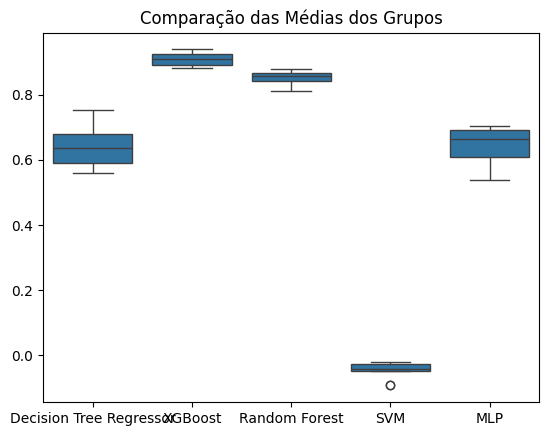

In [122]:
# Gráfico da comparação das médias dos grupos
# Importar bibliotecas
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(x=groups, y=data)
plt.title("Comparação das Médias dos Grupos")
plt.show()

# Salvar classificadores treinados

In [123]:
# Upload dos dados de teste e treinamento
import pickle
with open('/content/drive/MyDrive/Projeto Vendas Temporal/vendas.pkl', mode = 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

# Atributos previsores e classe
X_vendas = np.concatenate((X_train, X_test), axis = 0)
y_vendas = np.concatenate((y_train, y_test), axis = 0)

# RF, XGB e MLP
regressao_arvore = DecisionTreeRegressor(**melhores_parametros_arvore)
regressao_xgb = XGBRegressor(**melhores_parametros_xgb)
regressao_rf = RandomForestRegressor(**melhores_parametros_rf)
regressao_svr = SVR(**melhores_parametros_svr)
regressao_mlp = MLPRegressor(**melhores_parametros_mlp)

# Guardar os classificadores
import pickle
with open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_arvore.pkl', mode = 'wb') as f:
  pickle.dump(regressao_rf, f)
with open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_xgb.pkl', mode = 'wb') as f:
  pickle.dump(regressao_xgb, f)
with open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_rf.pkl', mode = 'wb') as f:
  pickle.dump(regressao_mlp, f)
with open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_svr.pkl', mode = 'wb') as f:
  pickle.dump(regressao_svr, f)
with open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_mlp.pkl', mode = 'wb') as f:
  pickle.dump(regressao_mlp, f)

# Teste dos classificadores

In [124]:
# Testar os classificadores guardados
# Carregar modelos
regressao_arvore = pickle.load(open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_arvore.pkl', 'rb'))
regressao_xgb = pickle.load(open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_xgb.pkl', 'rb'))
regressao_rf = pickle.load(open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_rf.pkl', 'rb'))
regressao_svr = pickle.load(open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_svr.pkl', 'rb'))
regressao_mlp = pickle.load(open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_mlp.pkl', 'rb'))

# Treinar os modelos
regressao_arvore.fit(X_vendas, y_vendas)
regressao_xgb.fit(X_vendas, y_vendas)
regressao_rf.fit(X_vendas, y_vendas)
regressao_svr.fit(X_vendas, y_vendas)
regressao_mlp.fit(X_vendas, y_vendas)

# Fazer previsões
y_pred_arvore = regressao_arvore.predict(X_test)
y_pred_xgb = regressao_xgb.predict(X_test)
y_pred_rf = regressao_rf.predict(X_test)
y_pred_svr = regressao_svr.predict(X_test)
y_pred_mlp = regressao_mlp.predict(X_test)

# Avaliar performance
# Importar bibliotecas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Cálculos de MSE, MAE e R^2
mse_arvore = mean_squared_error(y_test, y_pred_arvore)
mae_arvore = mean_absolute_error(y_test, y_pred_arvore)
r2_arvore = r2_score(y_test, y_pred_arvore)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Print dos erros de Árvore de decisão
print("Árvore de Decisão - MSE:", mse_arvore)
print("Árvore de Decisão - MAE:", mae_arvore)
print("Árvore de Decisão - R^2:", r2_arvore)

# Print dos erros de XGB
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - MAE:", mae_xgb)
print("XGBoost - R^2:", r2_xgb)

# Print dos erros de Random Forest
print("Random Forest - MSE:", mse_rf)
print("Random Forest - MAE:", mae_rf)
print("Random Forest - R^2:", r2_rf)

# Print dos erros de SVR
print("SVM - MSE:", mse_svr)
print("SVM - MAE:", mae_svr)
print("SVM - R^2:", r2_svr)

# Print dos erros de MLP
print("MLP - MSE:", mse_mlp)
print("MLP - MAE:", mae_mlp)
print("MLP - R^2:", r2_mlp)

Árvore de Decisão - MSE: 511336181.7209171
Árvore de Decisão - MAE: 9807.564985119072
Árvore de Decisão - R^2: 0.9810784053211521
XGBoost - MSE: 14.48828125
XGBoost - MAE: 2.90625
XGBoost - R^2: 1.0
Random Forest - MSE: 6533732324.651025
Random Forest - MAE: 60809.618281897274
Random Forest - R^2: 0.7582243557045819
SVM - MSE: 28470088118.389507
SVM - MAE: 96382.81698037878
SVM - R^2: -0.05351329928236681
MLP - MSE: 6533732324.651025
MLP - MAE: 60809.618281897274
MLP - R^2: 0.7582243557045819


# Prever o futuro

/content/drive/MyDrive/Projeto Vendas Temporal/

## Exploração dos dados

In [125]:
import pandas as pd
novos_dados = pd.read_csv('/content/drive/MyDrive/Projeto Vendas Temporal/Future_Sales.csv', delimiter = ';')
novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,45,26/10/2012,"760281,43",0.0,"58,85","38,82","192,3088989","8,667"
1,45,02/11/2012,"754648,09",0.0,"50,96","38,23","192,2869436","8,667"
2,45,09/11/2012,NaN,NaN,NaN,NaN,NaN,NaN
3,45,16/11/2012,NaN,NaN,NaN,NaN,NaN,NaN
4,45,23/11/2012,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,45,26/10/2012,"760281,43",0.0,"58,85","38,82","192,3088989","8,667"
1,45,02/11/2012,"754648,09",0.0,"50,96","38,23","192,2869436","8,667"
2,45,09/11/2012,NaN,NaN,NaN,NaN,NaN,NaN
3,45,16/11/2012,NaN,NaN,NaN,NaN,NaN,NaN
4,45,23/11/2012,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         62 non-null     int64  
 1   Date          62 non-null     object 
 2   Weekly_Sales  2 non-null      object 
 3   Holiday_Flag  2 non-null      float64
 4   Temperature   2 non-null      object 
 5   Fuel_Price    2 non-null      object 
 6   CPI           2 non-null      object 
 7   Unemployment  2 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.0+ KB


In [128]:
# Substituir ',' por '.' nas colunas Weekly_Sales, Temperature, Fuel_Price, CPI e Unemployment
novos_dados['Weekly_Sales'] = novos_dados['Weekly_Sales'].str.replace(',', '.').astype(float)
novos_dados['Temperature'] = novos_dados['Temperature'].str.replace(',', '.').astype(float)
novos_dados['Fuel_Price'] = novos_dados['Fuel_Price'].str.replace(',', '.').astype(float)
novos_dados['CPI'] = novos_dados['CPI'].str.replace(',', '.').astype(float)
novos_dados['Unemployment'] = novos_dados['Unemployment'].str.replace(',', '.').astype(float)
novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,45,26/10/2012,760281.43,0.0,58.85,38.82,192.308899,8.667
1,45,02/11/2012,754648.09,0.0,50.96,38.23,192.286944,8.667
2,45,09/11/2012,NaN,NaN,NaN,NaN,NaN,NaN
3,45,16/11/2012,NaN,NaN,NaN,NaN,NaN,NaN
4,45,23/11/2012,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# Formatar a coluna Date para atributo categórico
novos_dados['Date'] = pd.to_datetime(novos_dados['Date'], format='%d/%m/%Y', dayfirst=True)
novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         62 non-null     int64         
 1   Date          62 non-null     datetime64[ns]
 2   Weekly_Sales  2 non-null      float64       
 3   Holiday_Flag  2 non-null      float64       
 4   Temperature   2 non-null      float64       
 5   Fuel_Price    2 non-null      float64       
 6   CPI           2 non-null      float64       
 7   Unemployment  2 non-null      float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 4.0 KB


In [130]:
# Extração de informações do atributo categórico data
novos_dados['Year'] = novos_dados['Date'].dt.year
novos_dados['Month'] = novos_dados['Date'].dt.month
novos_dados['Day'] = novos_dados['Date'].dt.day
novos_dados['Weekday'] = novos_dados['Date'].dt.weekday  # (0 = segunda, 6 = domingo)
novos_dados['IsWeekend'] = novos_dados['Weekday'].apply(lambda x: 1 if x >= 5 else 0)  # Feriados e fins de semana


In [131]:
# Substituir valores NaN na coluna Holiday_Flag pelos respectivos feriados
import holidays

# Definir o país e anos para o pacote holiday
pais = 'US'
anos = list(range(novos_dados['Year'].min(), novos_dados['Year'].max() + 1))
novos_dados['Holiday_Flag'] = novos_dados['Holiday_Flag'].astype('float')

# Criar um objeto holidays para o país específico e anos
feriados = holidays.country_holidays(pais, years=anos)

# Preencher os valores NaN na coluna Holiday_Flag baseado no isholiday()
# Corrected: Using a loop to iterate through rows
for index, row in novos_dados.iterrows():
    if row['Holiday_Flag'] != 1.0 and pd.isna(row['Holiday_Flag']) and index in feriados:  # Check for NaN and non-holiday (0) values and if date is in feriados
        novos_dados.loc[index, 'Holiday_Flag'] = 1  # Set to 1 if date is holiday
    elif pd.isna(row['Holiday_Flag']):  # Check for NaN values not in feriados
        novos_dados.loc[index, 'Holiday_Flag'] = 0  # Set to 0 if date is not holiday

novos_dados['Holiday_Flag'] = novos_dados['Holiday_Flag'].astype('category')
novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,IsWeekend
0,45,2012-10-26,760281.43,0.0,58.85,38.82,192.308899,8.667,2012,10,26,4,0
1,45,2012-11-02,754648.09,0.0,50.96,38.23,192.286944,8.667,2012,11,2,4,0
2,45,2012-11-09,NaN,1.0,NaN,NaN,NaN,NaN,2012,11,9,4,0
3,45,2012-11-16,NaN,1.0,NaN,NaN,NaN,NaN,2012,11,16,4,0
4,45,2012-11-23,NaN,1.0,NaN,NaN,NaN,NaN,2012,11,23,4,0


In [132]:
import numpy as np
# Calcula o mínimo e o máximo da coluna 'Temperature' original
min_temp = -20
max_temp = 80

# Cria uma série de números aleatórios com o mesmo tamanho dos valores ausentes em 'Temperature'
num_missing = novos_dados['Temperature'].isna().sum()
random_temps = np.random.uniform(min_temp, max_temp, size=num_missing)

# Preenche os valores ausentes em 'Temperature' com os números aleatórios gerados
novos_dados['Temperature'] = novos_dados['Temperature'].fillna(pd.Series(random_temps, index=novos_dados[novos_dados['Temperature'].isna()].index))

novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,IsWeekend
0,45,2012-10-26,760281.43,0.0,58.850000,38.82,192.308899,8.667,2012,10,26,4,0
1,45,2012-11-02,754648.09,0.0,50.960000,38.23,192.286944,8.667,2012,11,2,4,0
2,45,2012-11-09,NaN,1.0,25.107938,NaN,NaN,NaN,2012,11,9,4,0
3,45,2012-11-16,NaN,1.0,29.419452,NaN,NaN,NaN,2012,11,16,4,0
4,45,2012-11-23,NaN,1.0,46.564562,NaN,NaN,NaN,2012,11,23,4,0


In [133]:
# Calcula o mínimo e o máximo da coluna 'Fuel_Price' original
min_price = 30
max_price = 50

# Cria uma série de números aleatórios com o mesmo tamanho dos valores ausentes em 'Fuel_Price'
num_missing = novos_dados['Fuel_Price'].isna().sum()
random_temps = np.random.uniform(min_price, max_price, size=num_missing)

# Preenche os valores ausentes em 'Fuel_Price' com os números aleatórios gerados
novos_dados['Fuel_Price'] = novos_dados['Fuel_Price'].fillna(pd.Series(random_temps, index=novos_dados[novos_dados['Fuel_Price'].isna()].index))

novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,IsWeekend
0,45,2012-10-26,760281.43,0.0,58.850000,38.820000,192.308899,8.667,2012,10,26,4,0
1,45,2012-11-02,754648.09,0.0,50.960000,38.230000,192.286944,8.667,2012,11,2,4,0
2,45,2012-11-09,NaN,1.0,25.107938,32.061462,NaN,NaN,2012,11,9,4,0
3,45,2012-11-16,NaN,1.0,29.419452,35.017805,NaN,NaN,2012,11,16,4,0
4,45,2012-11-23,NaN,1.0,46.564562,33.005296,NaN,NaN,2012,11,23,4,0


In [134]:
# Calcula o mínimo e o máximo da coluna 'CPI' original
min_cpi = 190
max_cpi = 194

# Cria uma série de números aleatórios com o mesmo tamanho dos valores ausentes em 'CPI'
num_missing = novos_dados['CPI'].isna().sum()
random_temps = np.random.uniform(min_cpi, max_cpi, size=num_missing)

# Preenche os valores ausentes em 'CPI' com os números aleatórios gerados
novos_dados['CPI'] = novos_dados['CPI'].fillna(pd.Series(random_temps, index=novos_dados[novos_dados['CPI'].isna()].index))

novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,IsWeekend
0,45,2012-10-26,760281.43,0.0,58.850000,38.820000,192.308899,8.667,2012,10,26,4,0
1,45,2012-11-02,754648.09,0.0,50.960000,38.230000,192.286944,8.667,2012,11,2,4,0
2,45,2012-11-09,NaN,1.0,25.107938,32.061462,190.740415,NaN,2012,11,9,4,0
3,45,2012-11-16,NaN,1.0,29.419452,35.017805,190.677463,NaN,2012,11,16,4,0
4,45,2012-11-23,NaN,1.0,46.564562,33.005296,193.323000,NaN,2012,11,23,4,0


In [135]:
# Calcula o mínimo e o máximo da coluna 'Unemployment' original
min_unem = 7
max_unem = 9

# Cria uma série de números aleatórios com o mesmo tamanho dos valores ausentes em 'Unemployment'
num_missing = novos_dados['Unemployment'].isna().sum()
random_temps = np.random.uniform(min_unem, max_unem, size=num_missing)

# Preenche os valores ausentes em 'Unemployment' com os números aleatórios gerados
novos_dados['Unemployment'] = novos_dados['Unemployment'].fillna(pd.Series(random_temps, index=novos_dados[novos_dados['Unemployment'].isna()].index))

novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,IsWeekend
0,45,2012-10-26,760281.43,0.0,58.850000,38.820000,192.308899,8.667000,2012,10,26,4,0
1,45,2012-11-02,754648.09,0.0,50.960000,38.230000,192.286944,8.667000,2012,11,2,4,0
2,45,2012-11-09,NaN,1.0,25.107938,32.061462,190.740415,8.073263,2012,11,9,4,0
3,45,2012-11-16,NaN,1.0,29.419452,35.017805,190.677463,7.711053,2012,11,16,4,0
4,45,2012-11-23,NaN,1.0,46.564562,33.005296,193.323000,8.298770,2012,11,23,4,0


In [136]:
# Calcula o mínimo e o máximo da coluna 'Weekly_Sales' original
min_sales = 750000
max_sales = 800000

# Cria uma série de números aleatórios com o mesmo tamanho dos valores ausentes em 'Weekly_Sales'
num_missing = novos_dados['Weekly_Sales'].isna().sum()
random_temps = np.random.uniform(min_sales, max_sales, size=num_missing)

# Preenche os valores ausentes em 'Weekly_Sales' com os números aleatórios gerados
novos_dados['Weekly_Sales'] = novos_dados['Weekly_Sales'].fillna(pd.Series(random_temps, index=novos_dados[novos_dados['Weekly_Sales'].isna()].index))

novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,IsWeekend
0,45,2012-10-26,760281.430000,0.0,58.850000,38.820000,192.308899,8.667000,2012,10,26,4,0
1,45,2012-11-02,754648.090000,0.0,50.960000,38.230000,192.286944,8.667000,2012,11,2,4,0
2,45,2012-11-09,751287.346643,1.0,25.107938,32.061462,190.740415,8.073263,2012,11,9,4,0
3,45,2012-11-16,799233.596757,1.0,29.419452,35.017805,190.677463,7.711053,2012,11,16,4,0
4,45,2012-11-23,763816.253355,1.0,46.564562,33.005296,193.323000,8.298770,2012,11,23,4,0


In [137]:
novos_dados['Store'] = novos_dados['Store'].astype('category')
novos_dados['Holiday_Flag'] = novos_dados['Holiday_Flag'].astype('category')
novos_dados['Temperature'] = novos_dados['Temperature'].astype('float32')
novos_dados['Fuel_Price'] = novos_dados['Fuel_Price'].astype('float32')
novos_dados['CPI'] = novos_dados['CPI'].astype('float32')
novos_dados['Unemployment'] = novos_dados['Unemployment'].astype('float32')
novos_dados['Weekly_Sales'] = novos_dados['Weekly_Sales'].astype('float32')
novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         62 non-null     category      
 1   Date          62 non-null     datetime64[ns]
 2   Weekly_Sales  62 non-null     float32       
 3   Holiday_Flag  62 non-null     category      
 4   Temperature   62 non-null     float32       
 5   Fuel_Price    62 non-null     float32       
 6   CPI           62 non-null     float32       
 7   Unemployment  62 non-null     float32       
 8   Year          62 non-null     int32         
 9   Month         62 non-null     int32         
 10  Day           62 non-null     int32         
 11  Weekday       62 non-null     int32         
 12  IsWeekend     62 non-null     int64         
dtypes: category(2), datetime64[ns](1), float32(5), int32(4), int64(1)
memory usage: 3.6 KB


In [138]:
# Colunas categóricas e colunas numéricas
cat_cols = novos_dados.select_dtypes(include=['category']).columns
num_cols = novos_dados.select_dtypes(include=['float32']).columns

In [139]:
for col in ['Year', 'Month', 'Day', 'Weekday', 'IsWeekend']:
  novos_dados[col] = novos_dados[col].astype('category')
novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         62 non-null     category      
 1   Date          62 non-null     datetime64[ns]
 2   Weekly_Sales  62 non-null     float32       
 3   Holiday_Flag  62 non-null     category      
 4   Temperature   62 non-null     float32       
 5   Fuel_Price    62 non-null     float32       
 6   CPI           62 non-null     float32       
 7   Unemployment  62 non-null     float32       
 8   Year          62 non-null     category      
 9   Month         62 non-null     category      
 10  Day           62 non-null     category      
 11  Weekday       62 non-null     category      
 12  IsWeekend     62 non-null     category      
dtypes: category(7), datetime64[ns](1), float32(5)
memory usage: 4.0 KB


## Engenharia de features

In [140]:
# Engenharia de features baseada em vendas
novos_dados['Sales_Lag1'] = novos_dados.groupby('Store')['Weekly_Sales'].shift(1)
novos_dados['Sales_Lag2'] = novos_dados.groupby('Store')['Weekly_Sales'].shift(2)
novos_dados['Avg_Monthly_Sales'] = novos_dados.groupby(['Year'])['Weekly_Sales'].transform('mean')
novos_dados['Avg_Weekly_Sales'] = novos_dados.groupby(['Month', 'Day'])['Weekly_Sales'].transform('mean')
novos_dados['Sales_Diff1'] = novos_dados['Weekly_Sales'] - novos_dados['Sales_Lag1']
novos_dados['Sales_Diff2'] = novos_dados['Weekly_Sales'] - novos_dados['Sales_Lag2']
novos_dados['Sales_Diff_Pct1'] = novos_dados['Weekly_Sales'] / novos_dados['Sales_Lag1'] - 1
novos_dados['Sales_Diff_Pct2'] = novos_dados['Weekly_Sales'] / novos_dados['Sales_Lag2'] - 1

# Engenharia de features baseada na temperatura
novos_dados['Temp_Lag1'] = novos_dados.groupby('Store')['Temperature'].shift(1)
novos_dados['Temp_Diff1'] = novos_dados['Temperature'] - novos_dados['Temp_Lag1']
novos_dados['Temp_Diff_Pct1'] = novos_dados['Temperature'] / novos_dados['Temp_Lag1'] - 1

# Engenharia de dados baseada em CPI
novos_dados['CPI_Lag1'] = novos_dados.groupby('Store')['CPI'].shift(1)
novos_dados['CPI_Diff1'] = novos_dados['CPI'] - novos_dados['CPI_Lag1']
novos_dados['CPI_Diff_Pct1'] = novos_dados['CPI'] / novos_dados['CPI_Lag1'] - 1

#Engenharia de dados baseada em Fuel_Price
novos_dados['Fuel_Price_Lag1'] = novos_dados.groupby('Store')['Fuel_Price'].shift(1)
novos_dados['Fuel_Price_Diff1'] = novos_dados['Fuel_Price'] - novos_dados['Fuel_Price_Lag1']
novos_dados['Fuel_Price_Diff_Pct1'] = novos_dados['Fuel_Price'] / novos_dados['Fuel_Price_Lag1'] - 1

# Enhenharia de dados baseada em Unemployment
novos_dados['Unemployment_Lag1'] = novos_dados.groupby('Store')['Unemployment'].shift(1)
novos_dados['Unemployment_Diff1'] = novos_dados['Unemployment'] - novos_dados['Unemployment_Lag1']
novos_dados['Unemployment_Diff_Pct1'] = novos_dados['Unemployment'] / novos_dados['Unemployment_Lag1'] - 1

In [141]:
# Transformação logarítmica para estabilizar grandes variações
import numpy as np
novos_dados['Log_Weekly_Sales'] = novos_dados['Weekly_Sales'].apply(lambda x: 0 if x == 0 else np.log(x))
novos_dados.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
0,45,2012-10-26,760281.4375,0.0,58.849998,38.820000,192.308899,8.667000,2012,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.541444
1,45,2012-11-02,754648.0625,0.0,50.959999,38.230000,192.286942,8.667000,2012,11,...,192.308899,-0.021957,-0.000114,38.820000,-0.590000,-0.015198,8.667000,0.000000,0.000000,13.534007
2,45,2012-11-09,751287.3750,1.0,25.107939,32.061462,190.740417,8.073263,2012,11,...,192.286942,-1.546524,-0.008043,38.230000,-6.168537,-0.161353,8.667000,-0.593737,-0.068505,13.529544
3,45,2012-11-16,799233.6250,1.0,29.419453,35.017807,190.677460,7.711053,2012,11,...,190.740417,-0.062958,-0.000330,32.061462,2.956345,0.092209,8.073263,-0.362210,-0.044865,13.591409
4,45,2012-11-23,763816.2500,1.0,46.564564,33.005295,193.322998,8.298770,2012,11,...,190.677460,2.645538,0.013874,35.017807,-2.012512,-0.057471,7.711053,0.587717,0.076218,13.546083


In [142]:
# Drop da coluna Weekly_Sales
novos_dados = novos_dados.drop(columns=['Weekly_Sales'])
novos_dados.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
0,45,2012-10-26,0.0,58.849998,38.820000,192.308899,8.667000,2012,10,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.541444
1,45,2012-11-02,0.0,50.959999,38.230000,192.286942,8.667000,2012,11,2,...,192.308899,-0.021957,-0.000114,38.820000,-0.590000,-0.015198,8.667000,0.000000,0.000000,13.534007
2,45,2012-11-09,1.0,25.107939,32.061462,190.740417,8.073263,2012,11,9,...,192.286942,-1.546524,-0.008043,38.230000,-6.168537,-0.161353,8.667000,-0.593737,-0.068505,13.529544
3,45,2012-11-16,1.0,29.419453,35.017807,190.677460,7.711053,2012,11,16,...,190.740417,-0.062958,-0.000330,32.061462,2.956345,0.092209,8.073263,-0.362210,-0.044865,13.591409
4,45,2012-11-23,1.0,46.564564,33.005295,193.322998,8.298770,2012,11,23,...,190.677460,2.645538,0.013874,35.017807,-2.012512,-0.057471,7.711053,0.587717,0.076218,13.546083


In [143]:
# Passar a coluna Date para index e definir a frequência semanal
novos_dados = novos_dados.drop_duplicates(subset=['Date'])
novos_dados = novos_dados.set_index('Date').asfreq('W-THU', method='ffill')
novos_dados.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-01,45,0.0,58.849998,38.820000,192.308899,8.667000,2012,10,26,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.541444
2012-11-08,45,0.0,50.959999,38.230000,192.286942,8.667000,2012,11,2,4,...,192.308899,-0.021957,-0.000114,38.820000,-0.590000,-0.015198,8.667000,0.000000,0.000000,13.534007
2012-11-15,45,1.0,25.107939,32.061462,190.740417,8.073263,2012,11,9,4,...,192.286942,-1.546524,-0.008043,38.230000,-6.168537,-0.161353,8.667000,-0.593737,-0.068505,13.529544
2012-11-22,45,1.0,29.419453,35.017807,190.677460,7.711053,2012,11,16,4,...,190.740417,-0.062958,-0.000330,32.061462,2.956345,0.092209,8.073263,-0.362210,-0.044865,13.591409
2012-11-29,45,1.0,46.564564,33.005295,193.322998,8.298770,2012,11,23,4,...,190.677460,2.645538,0.013874,35.017807,-2.012512,-0.057471,7.711053,0.587717,0.076218,13.546083


In [144]:
novos_dados.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'IsWeekend',
       'Sales_Lag1', 'Sales_Lag2', 'Avg_Monthly_Sales', 'Avg_Weekly_Sales',
       'Sales_Diff1', 'Sales_Diff2', 'Sales_Diff_Pct1', 'Sales_Diff_Pct2',
       'Temp_Lag1', 'Temp_Diff1', 'Temp_Diff_Pct1', 'CPI_Lag1', 'CPI_Diff1',
       'CPI_Diff_Pct1', 'Fuel_Price_Lag1', 'Fuel_Price_Diff1',
       'Fuel_Price_Diff_Pct1', 'Unemployment_Lag1', 'Unemployment_Diff1',
       'Unemployment_Diff_Pct1', 'Log_Weekly_Sales'],
      dtype='object')

In [145]:
# Guardar todas as colunas categóricas
cat_cols = novos_dados.select_dtypes(include=['category']).columns
cat_cols

Index(['Store', 'Holiday_Flag', 'Year', 'Month', 'Day', 'Weekday',
       'IsWeekend'],
      dtype='object')

In [146]:
# Guardar todas as colunas numéricas
num_cols = novos_dados.select_dtypes(include=['float32']).columns
num_cols

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Sales_Lag1',
       'Sales_Lag2', 'Avg_Monthly_Sales', 'Avg_Weekly_Sales', 'Sales_Diff1',
       'Sales_Diff2', 'Sales_Diff_Pct1', 'Sales_Diff_Pct2', 'Temp_Lag1',
       'Temp_Diff1', 'Temp_Diff_Pct1', 'CPI_Lag1', 'CPI_Diff1',
       'CPI_Diff_Pct1', 'Fuel_Price_Lag1', 'Fuel_Price_Diff1',
       'Fuel_Price_Diff_Pct1', 'Unemployment_Lag1', 'Unemployment_Diff1',
       'Unemployment_Diff_Pct1'],
      dtype='object')

In [147]:
novos_dados.isna().sum()

,0
Store,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Year,0
Month,0
Day,0
Weekday,0


In [148]:
# Remover valores faltantes
novos_dados = novos_dados.dropna()
novos_dados.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-15,45,1.0,25.107939,32.061462,190.740417,8.073263,2012,11,9,4,...,192.286942,-1.546524,-0.008043,38.230000,-6.168537,-0.161353,8.667000,-0.593737,-0.068505,13.529544
2012-11-22,45,1.0,29.419453,35.017807,190.677460,7.711053,2012,11,16,4,...,190.740417,-0.062958,-0.000330,32.061462,2.956345,0.092209,8.073263,-0.362210,-0.044865,13.591409
2012-11-29,45,1.0,46.564564,33.005295,193.322998,8.298770,2012,11,23,4,...,190.677460,2.645538,0.013874,35.017807,-2.012512,-0.057471,7.711053,0.587717,0.076218,13.546083
2012-12-06,45,1.0,-3.085529,31.082777,193.781372,7.330385,2012,11,30,4,...,193.322998,0.458374,0.002371,33.005295,-1.922518,-0.058249,8.298770,-0.968385,-0.116690,13.568482
2012-12-13,45,1.0,57.232502,34.030167,193.264282,7.257658,2012,12,7,4,...,193.781372,-0.517090,-0.002668,31.082777,2.947390,0.094824,7.330385,-0.072727,-0.009921,13.543181


## Préprocessamento dos dados

In [149]:
# Codificar colunas categóricas com Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(lambda x: le.fit_transform(x))
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,...,CPI_Lag1,CPI_Diff1,CPI_Diff_Pct1,Fuel_Price_Lag1,Fuel_Price_Diff1,Fuel_Price_Diff_Pct1,Unemployment_Lag1,Unemployment_Diff1,Unemployment_Diff_Pct1,Log_Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-25,0,1611968.125,0,39.930000,2.514,211.289139,8.106,0,1,18,...,211.242172,0.046967,0.000222,2.548,-0.034,-0.013344,8.106,0.0,0.0,14.292966
2010-03-04,0,1409727.625,0,46.630001,2.561,211.319641,8.106,0,1,25,...,211.289139,0.030502,0.000144,2.514,0.047,0.018695,8.106,0.0,0.0,14.158907
2010-03-11,0,1554806.625,0,46.500000,2.625,211.350143,8.106,0,2,4,...,211.319641,0.030502,0.000144,2.561,0.064,0.024990,8.106,0.0,0.0,14.256862
2010-03-18,0,1439541.625,0,57.790001,2.667,211.380646,8.106,0,2,11,...,211.350143,0.030502,0.000144,2.625,0.042,0.016000,8.106,0.0,0.0,14.179835
2010-03-25,0,1472515.750,0,54.580002,2.720,211.215637,8.106,0,2,18,...,211.380646,-0.165009,-0.000781,2.667,0.053,0.019873,8.106,0.0,0.0,14.202483


## Previsões

In [150]:
from sklearn.ensemble import RandomForestRegressor
# Carregar o modelo de Random Forest
with open('/content/drive/MyDrive/Projeto Vendas Temporal/regressao_rf.pkl', mode = 'rb') as f:
  regressao_rf = pickle.load(f)
# Instanciar regressao_rf
regressao_rf = RandomForestRegressor(**melhores_parametros_rf)
# Treinar o modelo
regressao_rf.fit(X_vendas, y_vendas)
# Fazer previsões
y_pred_rf = regressao_rf.predict(novos_dados)
# Apresentar previsões
y_pred_rf

array([1482147.55625   , 1508627.48666667, 1451628.59458333,
       1460982.1675    , 1475094.72708333, 1483513.49041667,
       1469543.98833333, 1462914.82541667, 1451111.19458333,
       1449619.36083333, 1472939.03208333, 1447489.31625   ,
       1477457.68083333, 1480429.27625   , 1470628.45083333,
       1453763.58958333, 1464591.29666667, 1467998.20708333,
       1460486.11666667, 1456353.00333333, 1446094.49291667,
       1473934.65875   , 1466147.75083333, 1452526.70958333,
       1447233.55916667, 1473234.39791667, 1443071.79125   ,
       1444203.84625   , 1464214.86666667, 1455739.46833333,
       1467320.60333333, 1483037.7475    , 1449544.30083333,
       1445067.03083333, 1445196.66916667, 1479163.33666667,
       1475288.84791667, 1449695.97916667, 1449580.75541667,
       1490767.72416667, 1453447.52833333, 1452482.89      ,
       1441718.10583333, 1452211.02958333, 1471751.93333333,
       1441683.70375   , 1450247.43666667, 1474901.20583333,
       1467406.22416667,